In [ ]:
import pandas as pd

df = pd.read_csv("creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<ipython-input-2-634f90301ad6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')


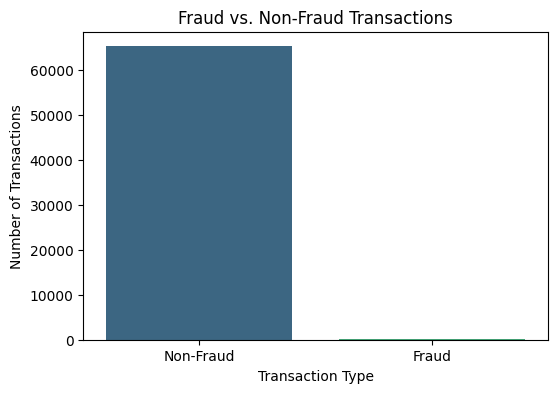

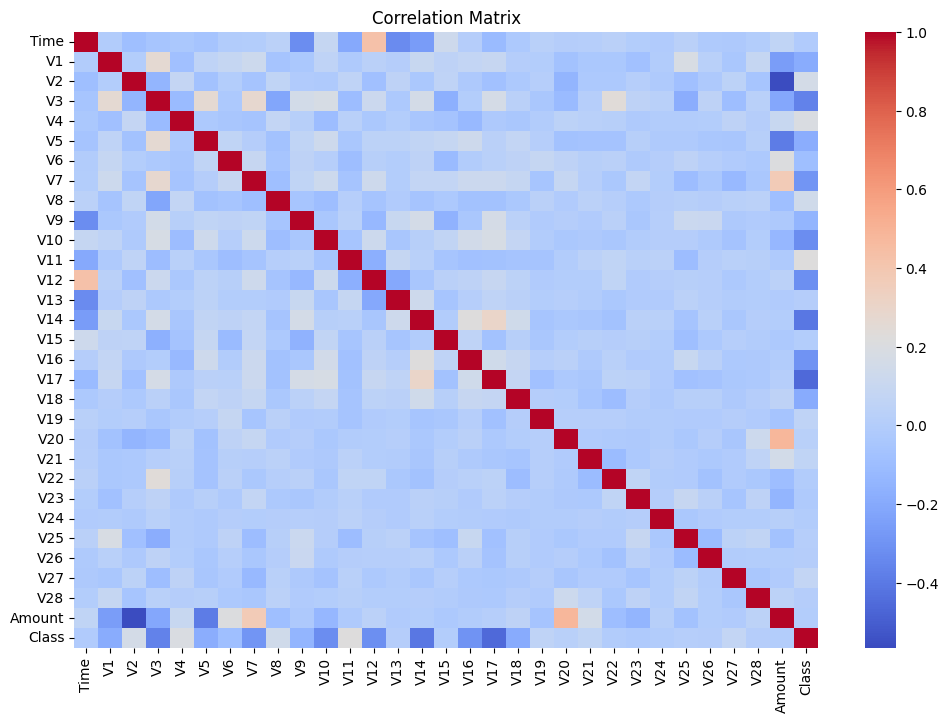

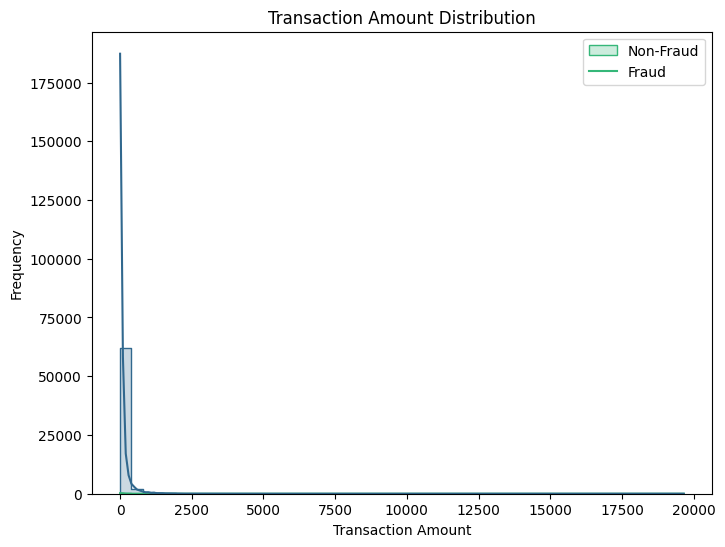

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('creditcard.csv')


# 1. Fraud vs. Non-Fraud Proportions
fraud_counts = df['Class'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.title('Fraud vs. Non-Fraud Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.show()

# 2. Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 3. Transaction Amount Distribution (Fraud vs. Non-Fraud)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Amount', hue='Class', kde=True, palette='viridis', bins=50, element="step")
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()


#Random Forest

Testing Progress: 100%|██████████| 300/300 [00:00<00:00, 5179.79it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       0.00      0.00      0.00         1

    accuracy                           1.00       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.99      1.00      1.00       300


Accuracy:
0.9966666666666667

Confusion Matrix:
[[299   0]
 [  1   0]]


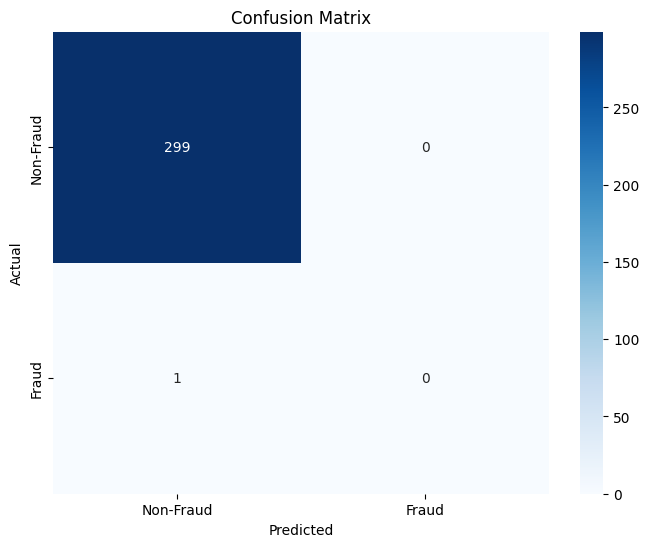

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


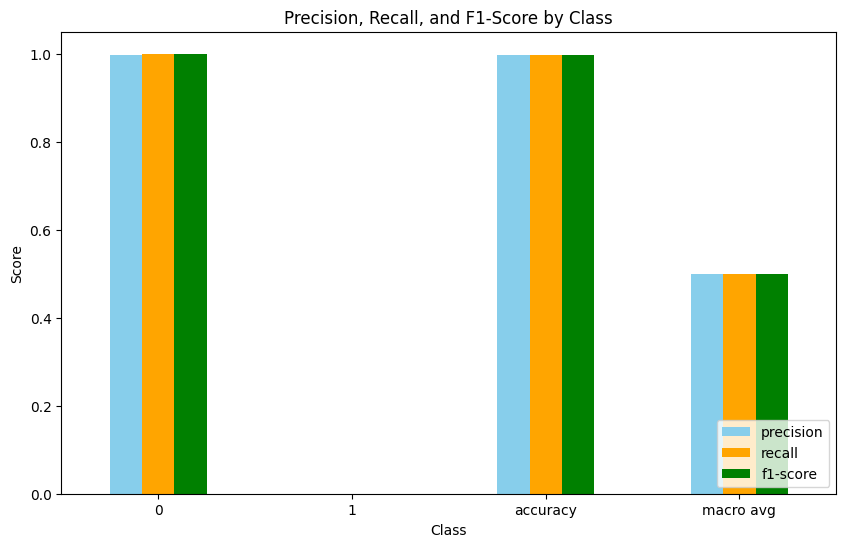

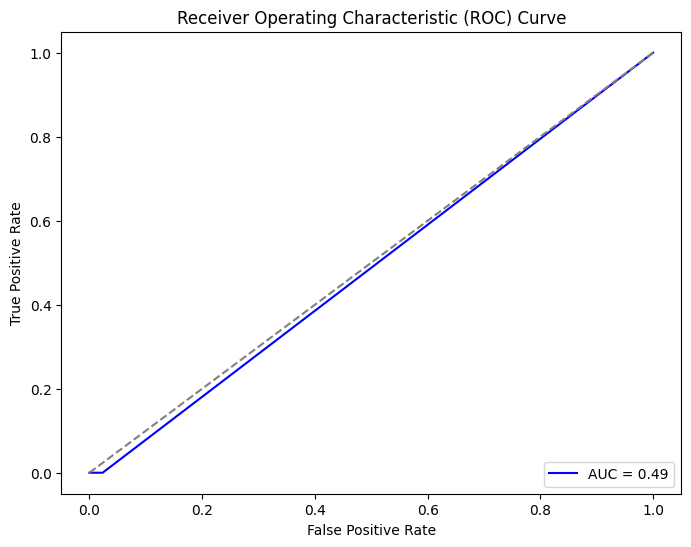

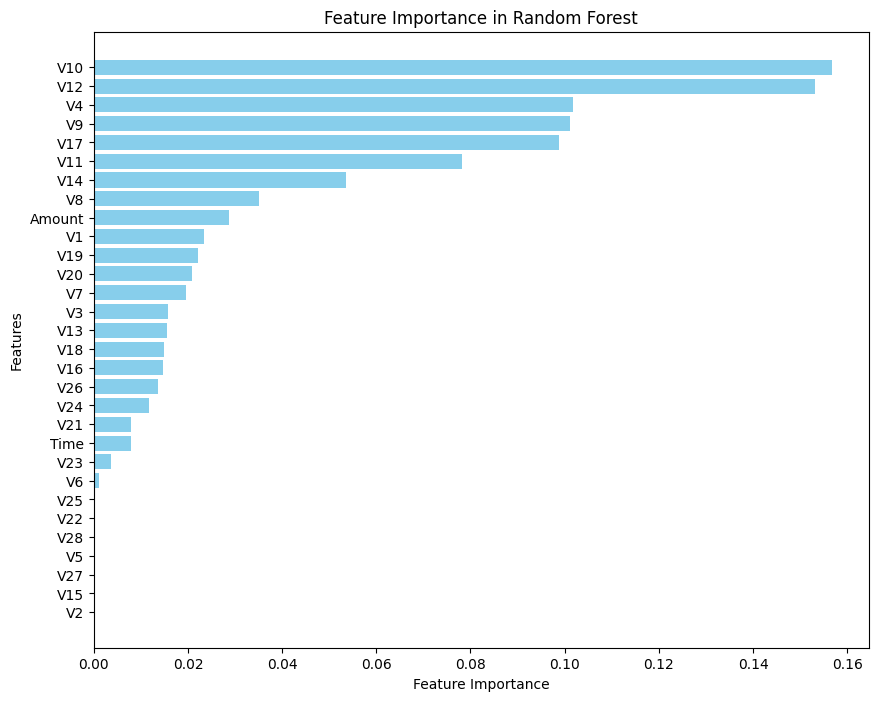

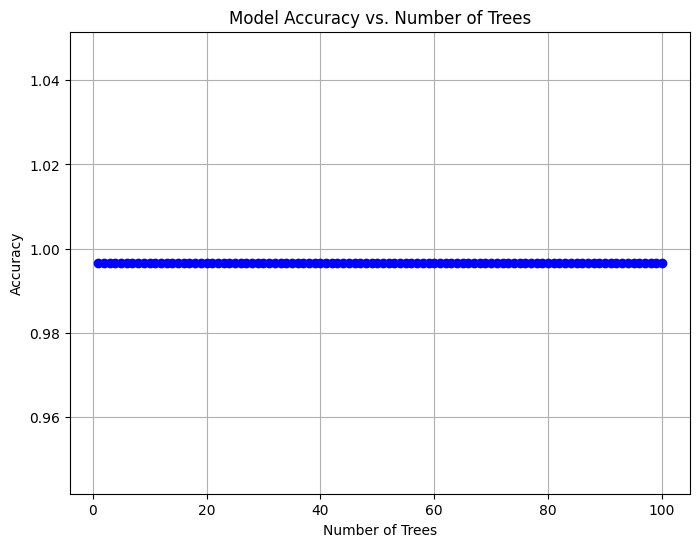

ValueError: x and y must have same first dimension, but have shapes (99,) and (100,)

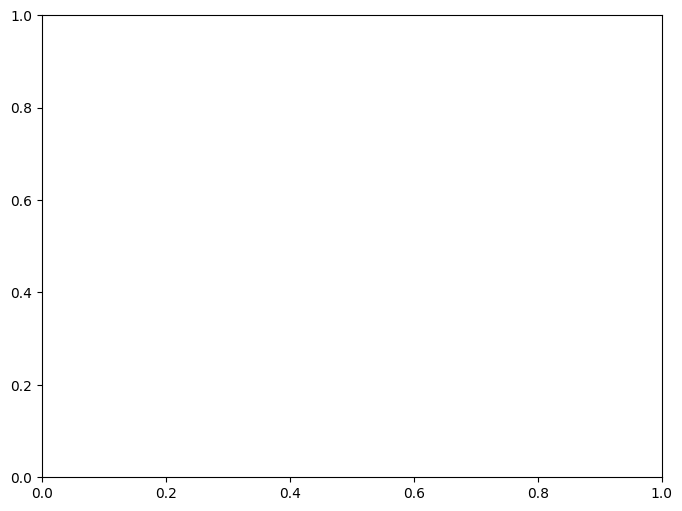

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve
from tqdm import tqdm

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Check for missing values
if df.isnull().sum().sum() > 0:
    print("Dataset contains missing values. Cleaning up...")
    df = df.dropna()

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

# Initialize Random Forest
n_estimators = 100
rf_model = RandomForestClassifier(n_estimators=1, random_state=42, warm_start=True)

# Train the model incrementally
with tqdm(total=n_estimators, desc="Training Progress") as pbar:
    for i in range(2, n_estimators + 1):
        rf_model.set_params(n_estimators=i)
        rf_model.fit(X_train, y_train)
        pbar.update(1)

# Test the model
batch_size = 100
y_pred = []

with tqdm(total=len(X_test), desc="Testing Progress") as pbar:
    for start in range(0, len(X_test), batch_size):
        end = min(start + batch_size, len(X_test))
        y_pred_batch = rf_model.predict(X_test[start:end])
        y_pred.extend(y_pred_batch)
        pbar.update(end - start)

# Generate predictions for probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 1. Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

metrics = ['precision', 'recall', 'f1-score']
df_report[metrics].iloc[:-1].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green'])
plt.title("Precision, Recall, and F1-Score by Class")
plt.ylabel("Score")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

# 4. Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], feature_importances[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

# 5. Accuracy vs. Number of Trees
# Accuracy vs. Number of Trees
accuracies = []

# Incrementally fit the Random Forest and track accuracy
rf_model = RandomForestClassifier(random_state=42, warm_start=True)  # Reset the model
for i in range(1, n_estimators + 1):  # Start with 1 tree
    rf_model.set_params(n_estimators=i)
    rf_model.fit(X_train, y_train)
    y_pred_incremental = rf_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_incremental))

# Plot accuracy vs. number of trees
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_estimators + 1), accuracies, marker='o', linestyle='-', color='blue')
plt.title("Model Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(2, n_estimators + 1), accuracies, marker='o', linestyle='-', color='blue')
plt.title("Model Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# 6. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="orange")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()

# 7. Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()


# K Nearest Neighbours

Accuracy: 99.67%
Precision: 99.33%
Recall: 99.67%
F1 Score: 99.50%


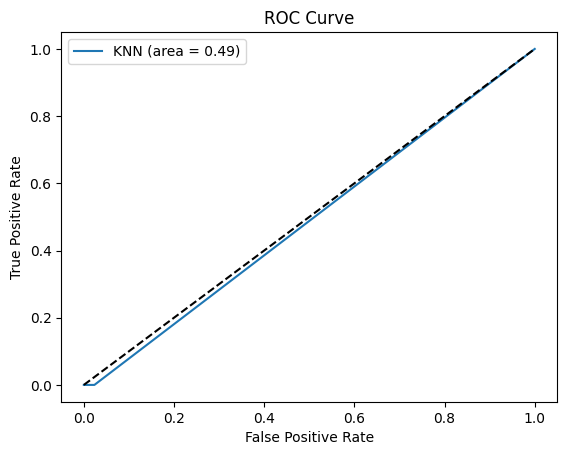

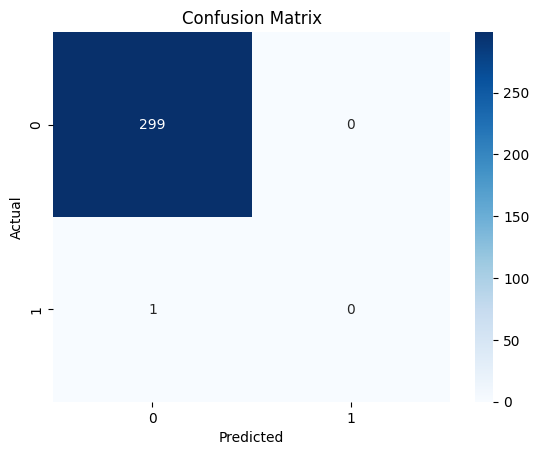

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def KNN_Model():
  knn = KNeighborsClassifier(n_neighbors=5)
  return knn

def train_knn_model(X_train, y_train):
    knn = KNN_Model()
    knn.fit(X_train, y_train)
    return knn

def make_predictions(knn, X_test):
    y_pred = knn.predict(X_test)
    return y_pred

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    print(f"Precision: {precision * 100:.2f}%")
    recall = recall_score(y_test, y_pred, average="weighted")
    print(f"Recall: {recall * 100:.2f}%")
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1 Score: {f1 * 100:.2f}%")
    if hasattr(knn, "predict_proba"):
        y_prob = knn.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label="KNN (area = {:.2f})".format(roc_auc_score(y_test, y_prob)))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


data = pd.read_csv("creditcard.csv")
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = train_knn_model(X_train, y_train)
y_pred = make_predictions(knn, X_test)
evaluate_model(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)





# Naive Bayes

Confusion Matrix:
 [[83452  1855]
 [   21   115]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443


Accuracy: 0.9780438420935594


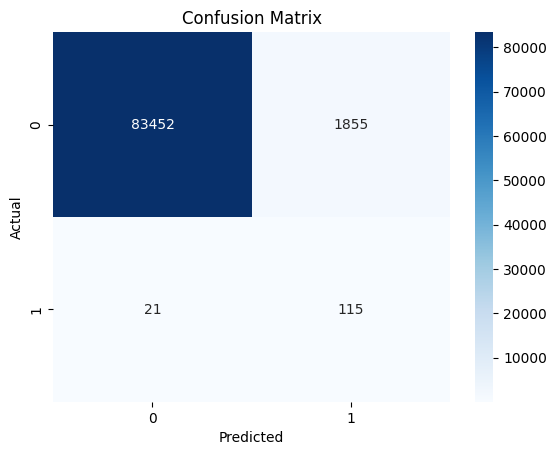

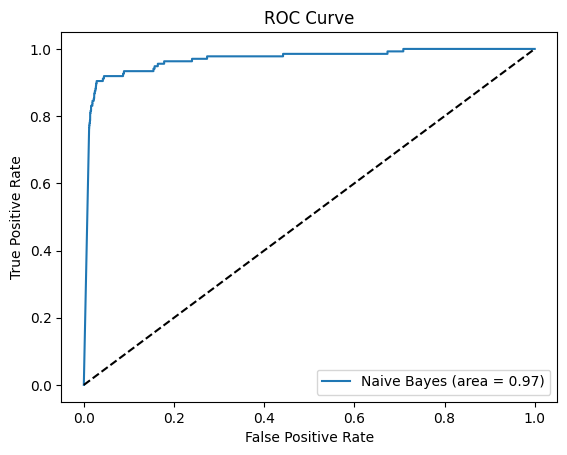

In [ ]:
#Naive bayes
import pandas as pd #to handle data frames
from sklearn.model_selection import train_test_split #for splitting data
from sklearn.naive_bayes import GaussianNB #getting the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler #importing scaler from preprocessing data module
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("creditcard.csv") #load the data set

#seperating the features and target variable in x and y
#essential step to prepare the data for ML alg.
x = df.drop('Class', axis=1) #features (ind. variables)
y = df['Class'] #target (dep. variables, fraudulent (1) and non-fraudulent(0))

#standardize features on the same scale
scaler = StandardScaler() #initialize the scaler
x = scaler.fit_transform(x) #use the scaler on the data (to have mean of 0 and SD of 1)

#splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#train_test_split function comes from sklearn.model_selection module a
#it splits the data into training and test sets RANDOMLY
#30% of the data will be used for testing
#70% of the data will be used for training
#random_states=42 contorls the randomness of the splitting process
#x_train, x_test are subsets of he features used for training and testing
#y_train, y_test are subsets of the target used for training and testing

#initialize and training the NB model
NB_model = GaussianNB() #creates an instance of the GaussianNB class
NB_model.fit(x_train, y_train) #trains (or fits) the model using the training data subsets

#model makes actual predictions on the test data using the now trained model
y_predicted = NB_model.predict(x_test)
#output is an array stored in y_predict that have predicted labels for each row in x_test subset
#labels are 1 (fraudulenet) and 0 (non-fraudulent)

#evaluations to understand the model performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted))
print("\nClassification Report:\n", classification_report(y_test, y_predicted))
print("\nAccuracy:", accuracy_score(y_test, y_predicted))
#confusion matrix: gives counts of true pos., false pos., true neg., and false neg. to see where the model is making errors
#classification report: gives precision, recall, and F-1 score
#Accuracy: measures overall performance (usually more insightful for balanced data)

#Visuals
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


if hasattr(NB_model, "predict_proba"):
        y_prob = NB_model.predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label="Naive Bayes (area = {:.2f})".format(roc_auc_score(y_test, y_prob)))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()














